In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [113]:
zomato=pd.read_csv('zomato.csv',encoding='latin-1')

In [114]:
zomato.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
Restaurant ID           9551 non-null int64
Restaurant Name         9551 non-null object
Country Code            9551 non-null int64
City                    9551 non-null object
Address                 9551 non-null object
Locality                9551 non-null object
Locality Verbose        9551 non-null object
Longitude               9551 non-null float64
Latitude                9551 non-null float64
Cuisines                9542 non-null object
Average Cost for two    9551 non-null int64
Currency                9551 non-null object
Has Table booking       9551 non-null object
Has Online delivery     9551 non-null object
Is delivering now       9551 non-null object
Switch to order menu    9551 non-null object
Price range             9551 non-null int64
Aggregate rating        9551 non-null float64
Rating color            9551 non-null object
Rating text             9551 non-null o

In [115]:
zomato.shape

(9551, 21)

In [116]:
zomato.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [117]:
zomato['Country Code'].value_counts()

1      8652
216     434
215      80
214      60
30       60
189      60
148      40
208      34
14       24
162      22
94       21
191      20
166      20
184      20
37        4
Name: Country Code, dtype: int64

In [118]:
max_resto=zomato[zomato['Country Code']==1]

In [119]:
len(max_resto)

8652

In [120]:
max_resto.drop(['Country Code','Currency'],axis=1,inplace=True)

D:\Installed_Apps\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [121]:
max_resto['City'].value_counts()

New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Lucknow           21
Ahmedabad         21
Guwahati          21
Amritsar          21
Allahabad         20
Goa               20
Kochi             20
Ludhiana          20
Nashik            20
Vadodara          20
Chennai           20
Indore            20
Surat             20
Bangalore         20
Nagpur            20
Mysore            20
Jaipur            20
Bhopal            20
Varanasi          20
Puducherry        20
Coimbatore        20
Mumbai            20
Kolkata           20
Pune              20
Mangalore         20
Kanpur            20
Dehradun          20
Patna             20
Vizag             20
Agra              20
Aurangabad        20
Ranchi            20
Chandigarh        18
Hyderabad         18
Secunderabad       2
Mohali             1
Panchkula          1
Name: City, dtype: int64

In [122]:
m1=max_resto['City']=='New Delhi'
m2=max_resto['City']=='Gurgaon'
m3=max_resto['City']=='Noida'

In [123]:
max_resto=max_resto[m1 | m2 | m3]

In [124]:
len(max_resto)

7671

In [125]:
max_resto.drop(['Restaurant Name','Restaurant ID','Rating color','Locality','Locality Verbose','Switch to order menu','Address','Rating text','Has Table booking','Has Online delivery','Is delivering now'],axis=1,inplace=True)

In [126]:
max_resto.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Votes
1161,Gurgaon,77.039310,28.424831,"Cafe, Beverages",350,1,3.4,16
1162,Gurgaon,77.039220,28.424913,"North Indian, Mughlai",800,2,2.7,80
1163,Gurgaon,77.097118,28.503077,"North Indian, Mughlai",2000,4,4.3,1887
1164,Gurgaon,77.097185,28.502613,"South Indian, Seafood, Kerala",1400,3,4.0,802
1165,Gurgaon,77.042009,28.511416,Bakery,250,1,3.0,4


In [127]:
from sklearn.preprocessing import LabelEncoder
max_resto.iloc[:,0]=LabelEncoder().fit_transform(max_resto.iloc[:,0])
max_resto.iloc[:,3]=LabelEncoder().fit_transform(max_resto.iloc[:,3])


In [128]:
max_resto.head()

,City,Longitude,Latitude,Cuisines,Average Cost for two,Price range,Aggregate rating,Votes
1161,0,77.039310,28.424831,158,350,1,3.4,16
1162,0,77.039220,28.424913,932,800,2,2.7,80
1163,0,77.097118,28.503077,932,2000,4,4.3,1887
1164,0,77.097185,28.502613,1082,1400,3,4.0,802
1165,0,77.042009,28.511416,69,250,1,3.0,4


In [129]:
X=max_resto.drop(['Average Cost for two'],axis=1).values
y=max_resto['Average Cost for two'].values

In [130]:
X

array([[0.00000000e+00, 7.70393103e+01, 2.84248315e+01, ...,
        1.00000000e+00, 3.40000000e+00, 1.60000000e+01],
       [0.00000000e+00, 7.70392204e+01, 2.84249125e+01, ...,
        2.00000000e+00, 2.70000000e+00, 8.00000000e+01],
       [0.00000000e+00, 7.70971178e+01, 2.85030769e+01, ...,
        4.00000000e+00, 4.30000000e+00, 1.88700000e+03],
       ...,
       [2.00000000e+00, 7.73671880e+01, 2.85578418e+01, ...,
        2.00000000e+00, 0.00000000e+00, 3.00000000e+00],
       [2.00000000e+00, 7.73673216e+01, 2.85579297e+01, ...,
        2.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.00000000e+00, 7.73671880e+01, 2.85578518e+01, ...,
        1.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

In [131]:
from sklearn.preprocessing import OneHotEncoder
X=OneHotEncoder(categorical_features=[0,3]).fit_transform(X).toarray()

In [132]:
X.shape

(7671, 1151)

In [152]:
from sklearn.cross_validation import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=2)

In [153]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()

In [154]:
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [155]:
y_pred=regressor.predict(X_test)

In [156]:
regressor.coef_##to view co efficient y=mx+b>>>>>>>>>>mx1+nx2+lx3+ox4+px5

array([-5.83259079e+00,  1.16472160e+01, -5.81462523e+00, ...,
        5.22453262e+02,  9.03546318e+00,  8.78828876e-02])

In [157]:
from sklearn import metrics #### r2 score
metrics.r2_score(y_test,y_pred)

0.7452671492088834

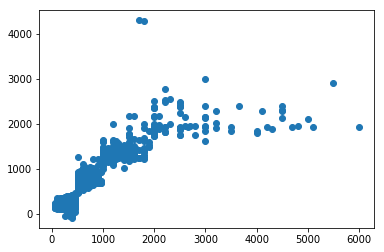

In [158]:
plt.scatter(y_test,y_pred)

D:\Installed_Apps\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


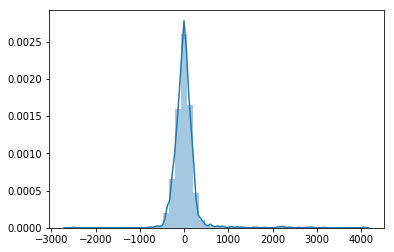

In [159]:
sns.distplot((y_test-y_pred))

In [160]:
def resto_name(name):
    indx=zomato[zomato['Restaurant Name']==name].index[0]
    print('Original price',zomato.iloc[indx,10])
    y_pred=regressor.predict(X[indx].reshape(1,-1))
    print('Predict price',y_pred[0])

In [161]:
resto_name('The Burger Chef')

Original price 350
Predict price 811.9247310470944


In [163]:
from sklearn.ensemble import RandomForestRegressor

forest=RandomForestRegressor(n_estimators=60)

In [164]:
forest.fit(X_train,y_train)
y_pred=forest.predict(X_test)

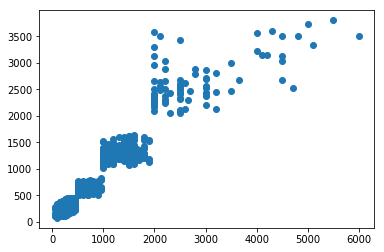

In [165]:
plt.scatter(y_test,y_pred)

In [166]:
from sklearn import metrics #### r2 score
metrics.r2_score(y_test,y_pred)

0.8892734267446715

In [167]:
def resto_name(name):
    indx=zomato[zomato['Restaurant Name']==name].index[0]
    print('Original price',zomato.iloc[indx,10])
    y_pred=forest.predict(X[indx].reshape(1,-1))
    print('Predict Price',y_pred[0])

In [168]:
resto_name('The Burger Chef')

Original price 350
Predict Price 743.6666666666666


array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 3.400e+00,
        1.600e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 2.000e+00, 2.700e+00,
        8.000e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 4.000e+00, 4.300e+00,
        1.887e+03],
       ...,
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        3.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [0.000e+00, 0.000e+00, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00]])